In [1]:
import corrosion

In [13]:
import importlib
importlib.reload(corrosion)

<module 'corrosion' from 'C:\\Users\\X3NON\\Desktop\\corrosion_rate_calculator-1\\corrosion.py'>

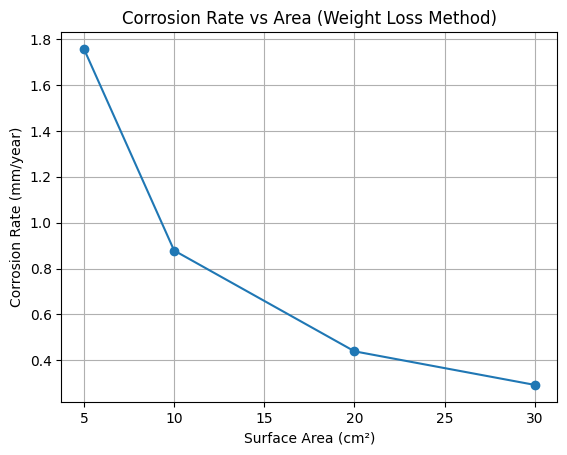

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from corrosion import (
    corrosion_rate_weight_loss_mm_per_y,
    corrosion_rate_LPR_mm_per_y,
    pitting_rate_mm_per_y,
    suggest_material,
)

# --- Example Code ---
W = 500.0      # mg
density = 7.85 # g/cm³ (steel)
A = 10.0       # cm²
t = 100.0      # hours

areas = [5, 10, 20, 30]
rates = [corrosion_rate_weight_loss_mm_per_y(W, density, a, t) for a in areas]

plt.plot(areas, rates, marker='o')
plt.xlabel("Surface Area (cm²)")
plt.ylabel("Corrosion Rate (mm/year)")
plt.title("Corrosion Rate vs Area (Weight Loss Method)")
plt.grid(True)
plt.show()


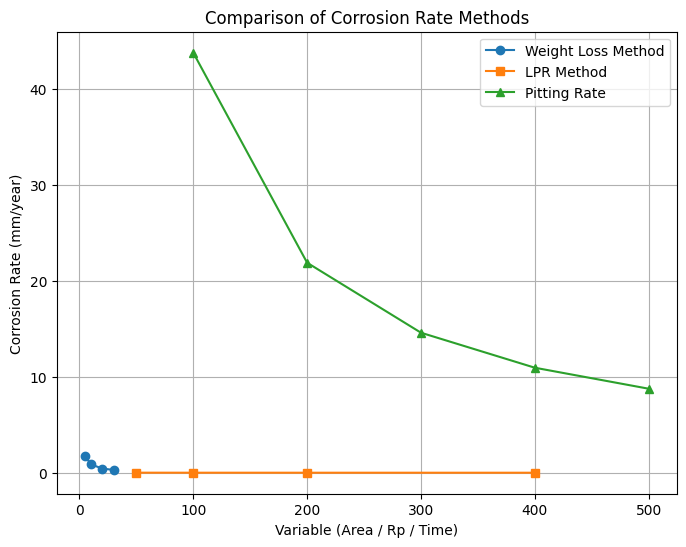

In [26]:
import matplotlib.pyplot as plt
from corrosion import (
    corrosion_rate_weight_loss_mm_per_y,
    corrosion_rate_LPR_mm_per_y,
    pitting_rate_mm_per_y,
)

# Example parameters
W = 500.0      # mg
density = 7.85 # g/cm³ (steel)
A = 10.0       # cm²
t = 100.0      # hours
B = 26.0       # mV (active steel)
Rp = 100.0     # ohm·cm²
EW = 27.92     # g/equiv for steel
depth = 0.5    # mm
t_pit = 500.0  # hours

# Generate a range of surface areas for comparison
areas = [5, 10, 20, 30]

# Weight Loss Method
rates_wl = [corrosion_rate_weight_loss_mm_per_y(W, density, a, t) for a in areas]

# LPR Method (keeping density same, vary Rp for example)
Rp_values = [50, 100, 200, 400]
rates_lpr = [corrosion_rate_LPR_mm_per_y(B, Rp, EW, density) for Rp in Rp_values]

# Pitting Rate (vary exposure time)
times = [100, 200, 300, 400, 500]
rates_pit = [pitting_rate_mm_per_y(depth, tp) for tp in times]

# --- Plot all together ---
plt.figure(figsize=(8,6))

plt.plot(areas, rates_wl, marker='o', label="Weight Loss Method")
plt.plot(Rp_values, rates_lpr, marker='s', label="LPR Method")
plt.plot(times, rates_pit, marker='^', label="Pitting Rate")

plt.xlabel("Variable (Area / Rp / Time)")
plt.ylabel("Corrosion Rate (mm/year)")
plt.title("Comparison of Corrosion Rate Methods")
plt.legend()
plt.grid(True)
plt.show()


Example Corrosion rate (mmpy): W=25.4 mg, density=7.85 g/cm3, Area=12.5 cm2, Time=168 h

In [20]:
rate_wl = corrosion.corrosion_rate_weight_loss_mm_per_y(25.4, 7.85, 12.5, 168)
print("Corrosion rate (mmpy):", round(rate_wl,2))

Corrosion rate (mmpy): 0.02


Example Pitting rate (mmpy): depth=0.35 mm in 720 h

In [21]:
rate_pit = corrosion.pitting_rate_mm_per_y(0.35, 720)
print("Pitting rate (mmpy):" ,round(rate_pit, 2))

Pitting rate (mmpy): 4.26


Example LPR Corrosion Rate(mmpy): B=26 mV, Rp=1200 ohm·cm2, EW=27.92, density=7.85

In [22]:
rate_lpr = corrosion.corrosion_rate_LPR_mm_per_y(26, 1200, 27.92, 7.85)
print("LPR Corrosion Rate(mmpy):" ,round(rate_lpr, 4))

LPR Corrosion Rate(mmpy): 0.0003


Example Material suggestion: Chloride=5000, pH=5.0, Temp=70.0°C

In [24]:
mat_sugg = corrosion.suggest_material(5000, 5.0, 70.0)
print("Material suggestion:", mat_sugg)

Material suggestion: {'suggestion': '316L stainless or 2205 duplex; consider corrosion inhibitor'}
